In [27]:
import os

import pandas as pd
import numpy as np
import math

from sklearn import preprocessing

import tensorflow as tf
from tensorflow import keras

from keras.layers import Dense
from keras.models import Sequential
from keras.optimizers import SGD
from tqdm.keras import TqdmCallback

import matplotlib.pyplot as plt

In [28]:
def prepare_data():
    ntot = 0
    ntrain = int(0.75*100)
    ntest = int(0.15*100)
#     x = np.random.rand(ntot,1)*2*np.pi
    x = np.random.randint(ntot,1)*2*np.pi
#     x = -np.random.rand(ntot,1)*2*np.pi
#     x = np.random.rand(ntot,1)*4*np.pi
#     s = np.linspace(0.0 , 2.0 * np.pi, ntot).reshape(-1, 1)
#     y = np.random.rand(ntot,1)*2*np.pi
    s=np.random.normal(0,0.1,size = (100,1))
    print(s.shape)
    print(x.shape)
    y=np.sin(x)+s
#     x=np.sin(y)+s
    xtrain, xtest = x[:ntrain], x[ntest:]
    ytrain, ytest = y[:ntrain], y[ntest:]
    plt.plot(xtrain.T,ytrain.T,color = 'red', marker = "o")
    plt.title("seno")
    plt.xlabel("Angulo")
    plt.ylabel("Seno")
    plt.grid()
    plt.show()
    return xtrain, ytrain, xtest, ytest

In [29]:
def fit_model1(xtrain, ytrain, xtest, ytest, epochs, lr, momentum, patience):
    
    early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=patience)
    # define model
#         model = Sequential([Dense(10, activation='tanh', input_dim=1),
#                             Dense(1, activation='linear')
#                            ])
    model = Sequential([Dense(10, activation='relu', input_dim=1),
                        Dense(1, activation='linear')
                       ])
    # compile model
    opt = SGD(lr, momentum=momentum)
    model.compile(loss='mean_squared_error', optimizer=opt, metrics=['mse'])
    model.summary()
    
    # fit model
    history = model.fit(xtrain, ytrain, validation_data=(xtest, ytest), epochs=epochs,  batch_size=75, verbose=0, callbacks=[early_stop, TqdmCallback(verbose=2)])
#     history = model.fit(xtrain, ytrain, validation_data=(xtest, ytest), epochs=epochs,  batch_size=75, verbose=0, callbacks=[early_stop])
    #history = model.fit(xtrain, ytrain, validation_data=(xtest, ytest), epochs=epochs,  batch_size=5, verbose=0)

    # plot learning curves
    plt.plot(history.history['loss'], label='train')
    plt.plot(history.history['val_loss'], label='test')
#     plt.xlabel("Iteration")
    plt.title('learning rate='+str(lr), pad=-80)
    return model

In [30]:
xtrain, ytrain, xtest, ytest = prepare_data()

scaler = preprocessing.MinMaxScaler()
# fit using the train set
scaler.fit(xtrain)
# transform the test test
xtrainN = scaler.transform(xtrain)
xtestN = scaler.transform(xtest) 

# X = np.linspace(0.0 , 2.0 * np.pi, 360).reshape(-1, 1)
X = np.linspace(-np.pi , 3.0 * np.pi, 360).reshape(-1, 1)
# X = np.linspace(2.0 * np.pi,10, 360).reshape(-1, 1)
# X = np.linspace(-10,2.0 * np.pi, 360).reshape(-1, 1)
# X = np.linspace(-1 ,1, 360).reshape(-1, 1)
print(X)
print("-----------------")
XN = scaler.transform(X)
print(XN)

(100, 1)


AttributeError: 'float' object has no attribute 'shape'

In [ ]:
model1 = fit_model1(xtrainN, ytrain, xtestN, ytest, 200, 0.01, 0.8, 100)

In [ ]:
Y = model1.predict(XN)
plt.plot(XN,Y,color = 'red', marker = "o")
plt.plot(xtrainN.T,ytrain.T,color = 'black', marker= "+")
plt.title("seno")
plt.xlabel("Angulo")
plt.ylabel("Seno")
plt.grid()
plt.show()

In [ ]:
def fit_model2(xtrain, ytrain, xtest, ytest, epochs, lr, momentum, patience):
    
    early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=patience)
    # define model
#     "    model = Sequential([Dense(100, activation='relu', input_dim=1),\n",
#     "                        Dense(1, activation='linear')\n",
#     "                       ])\n",
    model = Sequential([Dense(100, activation='sigmoid', input_dim=1),
                        Dense(1, activation='linear')
                       ])
    # compile model
    opt = SGD(lr, momentum=momentum)
    model.compile(loss='mean_squared_error', optimizer=opt, metrics=['mse'])
    model.summary()
    # fit model
    history = model.fit(xtrain, ytrain, validation_data=(xtest, ytest), epochs=epochs,  batch_size=5, verbose=0, callbacks=[early_stop, TqdmCallback(verbose=2)])

    # plot learning curves
    plt.plot(history.history['loss'], label='train')
    plt.plot(history.history['val_loss'], label='test')
    plt.title('learning rate='+str(lr), pad=-80)
    return model

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 100)               200       
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 101       
Total params: 301
Trainable params: 301
Non-trainable params: 0
_________________________________________________________________


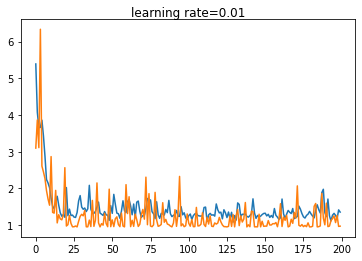

In [19]:
model2 = fit_model2(xtrainN, ytrain, xtestN, ytest, 200, 0.01, 0.8, 100)

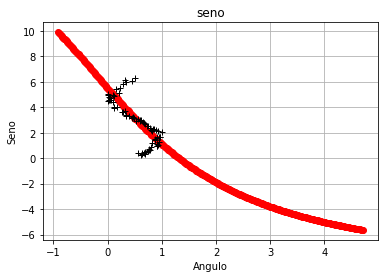

In [20]:
Y = model2.predict(XN)
plt.plot(XN,Y,color = 'red', marker = "o")
plt.plot(xtrainN.T,ytrain.T,color = 'black', marker= "+")
plt.title("seno")
plt.xlabel("Angulo")
plt.ylabel("Seno")
plt.grid()
plt.show()

In [21]:
def fit_model3(xtrain, ytrain, xtest, ytest, epochs, lr, momentum, patience):
    
    early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=patience)
    # define model
#     "    #model = Sequential([Dense(10, activation='tanh', input_dim=1),\n",
#     "    model = Sequential([Dense(100, activation='relu', input_dim=1),\n",
#     "                        Dense(64, activation='relu'),\n",
#     "                        Dense(1)\n",
#     "                       ])\n",
#     "    # compile model\n",
    #model = Sequential([Dense(10, activation='tanh', input_dim=1),
    model = Sequential([Dense(100, activation='relu', input_dim=1),
                        Dense(64, activation='sigmoid'),
                        Dense(1)#, activation='linear')
                       ])
    # compile model
    opt = SGD(lr, momentum=momentum)
    model.compile(loss='mean_squared_error', optimizer=opt, metrics=['mse'])
    model.summary()
    # fit model
    history = model.fit(xtrain, ytrain, validation_data=(xtest, ytest), epochs=epochs,  batch_size=5, verbose=0, callbacks=[early_stop, TqdmCallback(verbose=1)])

    # plot learning curves
    plt.plot(history.history['loss'], label='train')
    plt.plot(history.history['val_loss'], label='test')
    plt.title('learning rate='+str(lr), pad=-80)
    
    return model

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 100)               200       
_________________________________________________________________
dense_10 (Dense)             (None, 64)                6464      
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 65        
Total params: 6,729
Trainable params: 6,729
Non-trainable params: 0
_________________________________________________________________


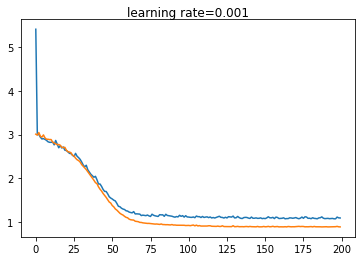

In [22]:
model3 = fit_model3(xtrainN, ytrain, xtestN, ytest, 200, 0.001, 0.8, 100)

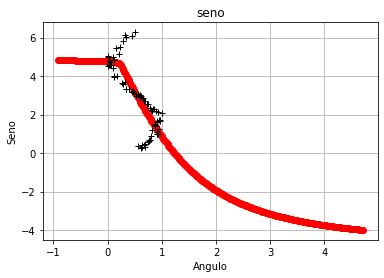

In [23]:
Y = model3.predict(XN)
plt.plot(XN,Y,color = 'red', marker = "o")
plt.plot(xtrainN.T,ytrain.T,color = 'black', marker= "+")
plt.title("seno")
plt.xlabel("Angulo")
plt.ylabel("Seno")
plt.grid()
plt.show()